## Unsupervised Learning | Project-1

## Part 1

### Context:
The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3
multivalued discrete and 5 continuous attributes

### Data Description:
The data concerns city-cycle fuel consumption in miles per gallon

### Attribute Information:
1. mpg: Continuous (Target variable)
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

### Import Libraries

In [2165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PowerTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

### Data Preperation

In [2166]:
# Read the .csv file and store data into dataframe
df1 = pd.read_csv("Car+name.csv")
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [2167]:
# Verify the number of records and column
df1.shape

(398, 1)

<b>Observation:</b>
- Thre are 398 records and 1 attribute in first dataset

In [2168]:
# Read the .json file and store the data into dataframe
df2 = pd.read_json("Car-Attributes.json")
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [2169]:
df2.shape

(398, 8)

<b>Observation:</b>
- There are 398 records and 8 attributes in second dataset

In [2170]:
# Merge two datasets into single dataframe
dffinal = df1.join(df2)
dffinal.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [2171]:
dffinal.shape

(398, 9)

<b>Observation:</b>
- There are 398 records and 9 attributes in final(merged) dataset. 

In [2172]:
# To export final dataset into .csv, .xlsx and .json files
dffinal.to_csv("CarMPG.csv", index=False)
dffinal.to_excel("CarMPG.xlsx", index=False)
dffinal.to_json("CarMPG.json")

### Read the Dataset and Data cleansing

In [2173]:
# Read the data from exported file and store the data into the dataframe
dfauto = pd.read_csv("CarMPG.csv")

In [2174]:
dfauto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


<b>Observation:</b>
- There is no missing value in dataset.
- car_name and hp attributes are object datatype and rest ones are numeric type. 
- hp should be numeric type.


In [2175]:
# Checking that any other non-digit values are there in hp attribute
dfauto[dfauto["hp"].str.isdigit() == False]['hp']

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

<b>Observation:</b>
- There are "?" values in hp attribute

In [2176]:
# Replace ? with nan
dfauto = dfauto.replace('?', np.nan)

# Change the datatype to float
dfauto['hp'] = dfauto['hp'].astype('float64')

# Update the mean value of hp
dfauto['hp'] = np.where(dfauto['hp'].isnull(),np.mean(dfauto['hp']),dfauto['hp'])

In [2177]:
# To verify that anyother non-numeric values are there or not in hp attribute
dfauto[dfauto['hp'].apply(lambda x: isinstance(x, str))]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [2178]:
dfauto.nunique()

car_name    305
mpg         129
cyl           5
disp         82
hp           94
wt          351
acc          95
yr           13
origin        3
dtype: int64

<b>Observation:</b>
- car_name, cyl, origin and year are categorical variables while rest of the attributes are non-categorical variables. 
- There are 305 unique values in car_name.

In [2179]:
dfauto["car_name"].value_counts().head(20)

ford pinto            6
amc matador           5
ford maverick         5
toyota corolla        5
chevrolet impala      4
chevrolet chevette    4
toyota corona         4
amc hornet            4
amc gremlin           4
peugeot 504           4
volkswagen dasher     3
ford galaxie 500      3
ford gran torino      3
dodge colt            3
chevrolet nova        3
plymouth duster       3
pontiac catalina      3
chevrolet vega        3
plymouth fury iii     3
honda civic           3
Name: car_name, dtype: int64

<b>Observation:</b>
- Data in car_name attribute is not useful for model since there are very few car names which are repeated.

In [2180]:
# Dropping car_name attribute since it will not be added any value to the model
dfauto.drop("car_name", axis=1, inplace=True)

In [2181]:
# Compression Ratio. Cylinder capacity is the total engine displacement divided by the number of cylinders
dfauto['dispercyl'] = dfauto['disp'] / dfauto['cyl']

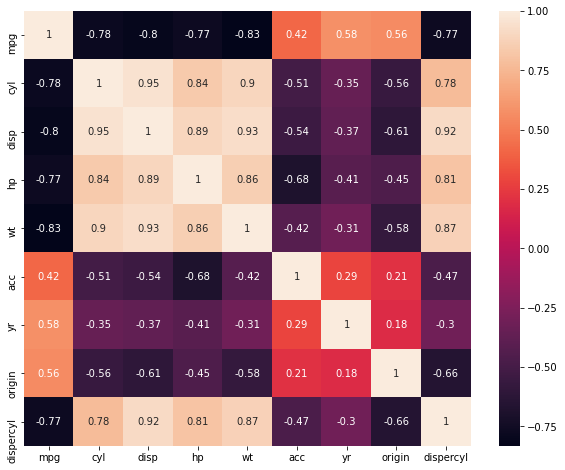

In [2182]:
# Plot the correlations between the attributes.
corr = dfauto.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

<b>Observation:</b>
- Cylinders(cyl), Displacement(disp), HorsePower(hp), Weight(wt) and Displacement Cylinder ratio are high negitive correlation with MPG.
- Cylinders, Displacement, HorsePower, weight are having high positive correlation between them.

### Data Analysis and Visualization

#### Univariate Analysis

In [2183]:
# Five point summary
dfauto.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.000000,29.000000,46.600
cyl,398.0,5.454774,1.701004,3.0,4.000,4.000000,8.000000,8.000
disp,398.0,193.425879,104.269838,68.0,104.250,148.500000,262.000000,455.000
hp,398.0,104.469388,38.199187,46.0,76.000,95.000000,125.000000,230.000
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.500000,3608.000000,5140.000
acc,398.0,15.568090,2.757689,8.0,13.825,15.500000,17.175000,24.800
yr,398.0,76.010050,3.697627,70.0,73.000,76.000000,79.000000,82.000
origin,398.0,1.572864,0.802055,1.0,1.000,1.000000,2.000000,3.000
dispercyl,398.0,33.365054,8.687268,17.0,24.625,33.333333,38.916667,56.875


<b>Observation:</b>
- There are few outliers in hp and acc. 
- All type of cars having at least 3 cylinders. 
- 50% of cars having mpg value less than or equal to 23.

Mean of mpg is 23.514572864321615
Mean of disp is 193.42587939698493
Mean of hp is 104.46938775510206
Mean of wt is 2970.424623115578
Mean of acc is 15.568090452261291
Mean of dispercyl is 33.36505443886099
Mean of yr is 76.01005025125629


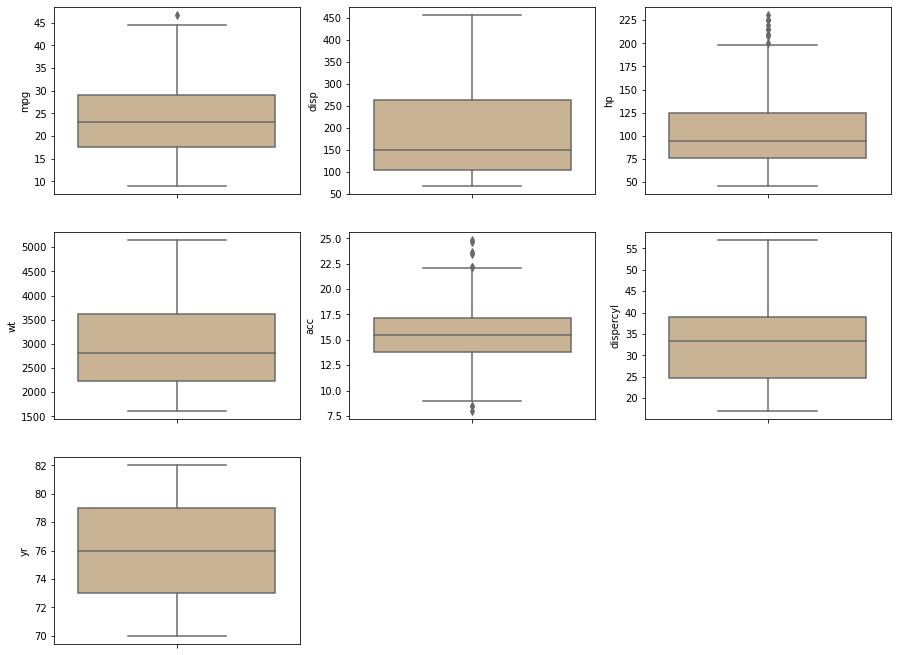

In [2184]:
# Ploting the boxplot for mpg, disp, hp, wt, acc and yr. 
col = ['mpg', 'disp', 'hp', 'wt', 'acc','dispercyl', 'yr']
plt.figure(figsize=(15,20))
for i,col in enumerate(col):
    plt.subplot(5,3,i+1)
    sns.boxplot(dfauto[col], orient="v" , color="tan")
    print("Mean of",col,"is", dfauto[col].mean())

<b>Observation:</b>
- From the above plots it is observed the Horsepower attribute contains some outliers in upper boundary and it is right Skewed.
- The values in Displacement and Weight are right skewed.
- Acceleration is having few outliers in upper and lower boudaries. 
- There is an outlier in mpg attribute. 

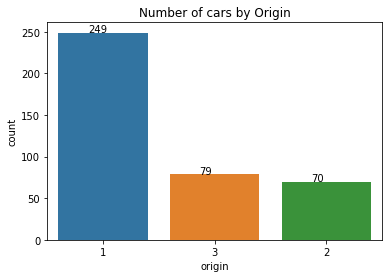

In [2185]:
# Plotting countplot for Origin
plt.title("Number of cars by Origin")
ax = sns.countplot(dfauto["origin"], 
                   order = dfauto["origin"].value_counts().index)

for p, label in zip(ax.patches, dfauto["origin"].value_counts()):
    ax.annotate(label, (p.get_x()+0.265, p.get_height()+0.15))

<b>Observation:</b>
- Origin1 has most number of cars.
- Origin2 and Origin3 have 70 and 79 cars respectively. 

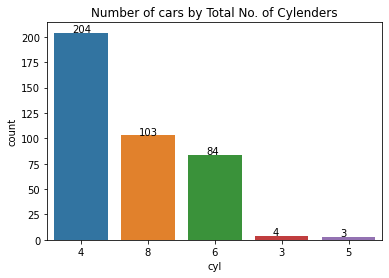

In [2186]:
# Plotting countplot for Cylinders
plt.title("Number of cars by Total No. of Cylenders")
ax = sns.countplot(dfauto["cyl"], 
                   order = dfauto["cyl"].value_counts().index)

for p, label in zip(ax.patches, dfauto["cyl"].value_counts()):
    ax.annotate(label, (p.get_x()+0.270, p.get_height()+0.15))

<b>Observation:</b>
- 204 cars are having 4 cylinders.
- There are least number of cars having 3 and 5 cyliners. 

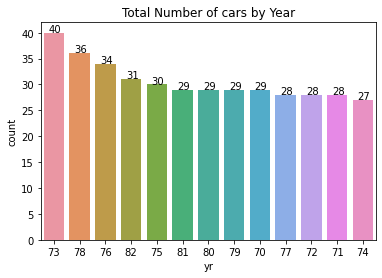

In [2187]:
# Plotting countplot for Year of Model
plt.title("Total Number of cars by Year")
ax = sns.countplot(dfauto["yr"], 
                   order = dfauto["yr"].value_counts().index)

for p, label in zip(ax.patches, dfauto["yr"].value_counts()):
    ax.annotate(label, (p.get_x()+0.200, p.get_height()+0.15))

<b>Observation:</b>
- Cars of year of model 73 has the highest number of cars.
- Other years of model are almost distributed similarly.

#### Bivariate Analysis

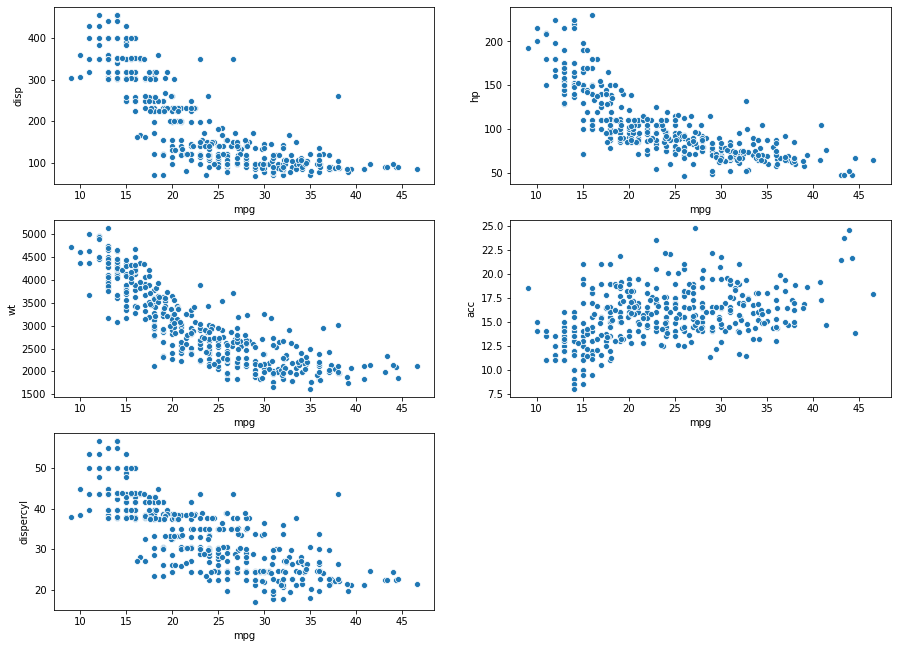

In [2188]:
# Plotting the graph for disp, hp, wt and acc with mpg.
col = ['disp','hp','wt','acc','dispercyl']
figr=plt.figure(figsize=(15,15))
for i,c in enumerate(col):
    plt.subplot(4,2,i+1)
    sns.scatterplot(x="mpg", y=c,data=dfauto)

<b>Observation:</b>
- Above plot shows that when MPG value increases disp, hp and weight values are getting decreased.  
- Mpg value only increases slightly when we increase Acceleration of car.

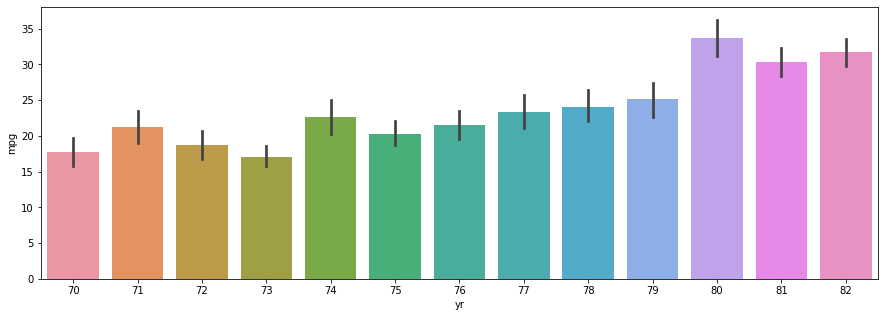

In [2189]:
# Plotting the graph between year of model and mpg. 
plt.figure(figsize=(15,5))
sns.barplot(x="yr",y="mpg",data=dfauto)

<b>Observation:</b>
- Cars of model year 80 has the highest average MPG value

#### Multivariate Analysis

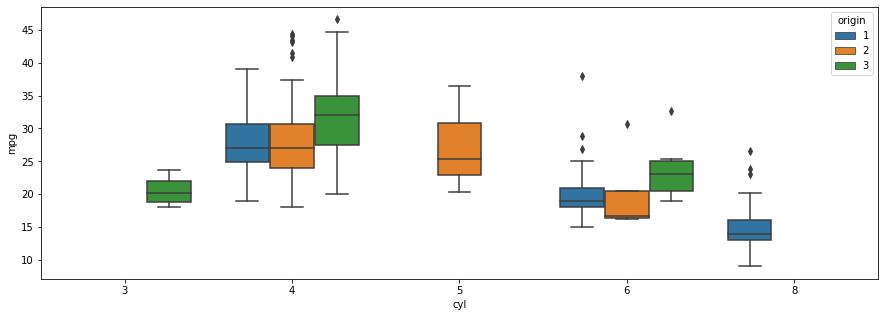

In [2190]:
plt.figure(figsize=(15,5))
sns.boxplot(x='cyl',y='mpg',hue='origin', data=dfauto)

<b>Observation:</b>
- Origin3 cars have higher number of mpg values with 4 cylinders. 
- Origin1 cars have less mpg values with 8 cylinders. 
- Origin1 and Origin2 cars have almost same mpg values with 4 cylinders. 
- There is no car with 3 cylinders in Origin1 and Origin2.
- There is no car with 5 cylinders in Origin1 and Origin3. 

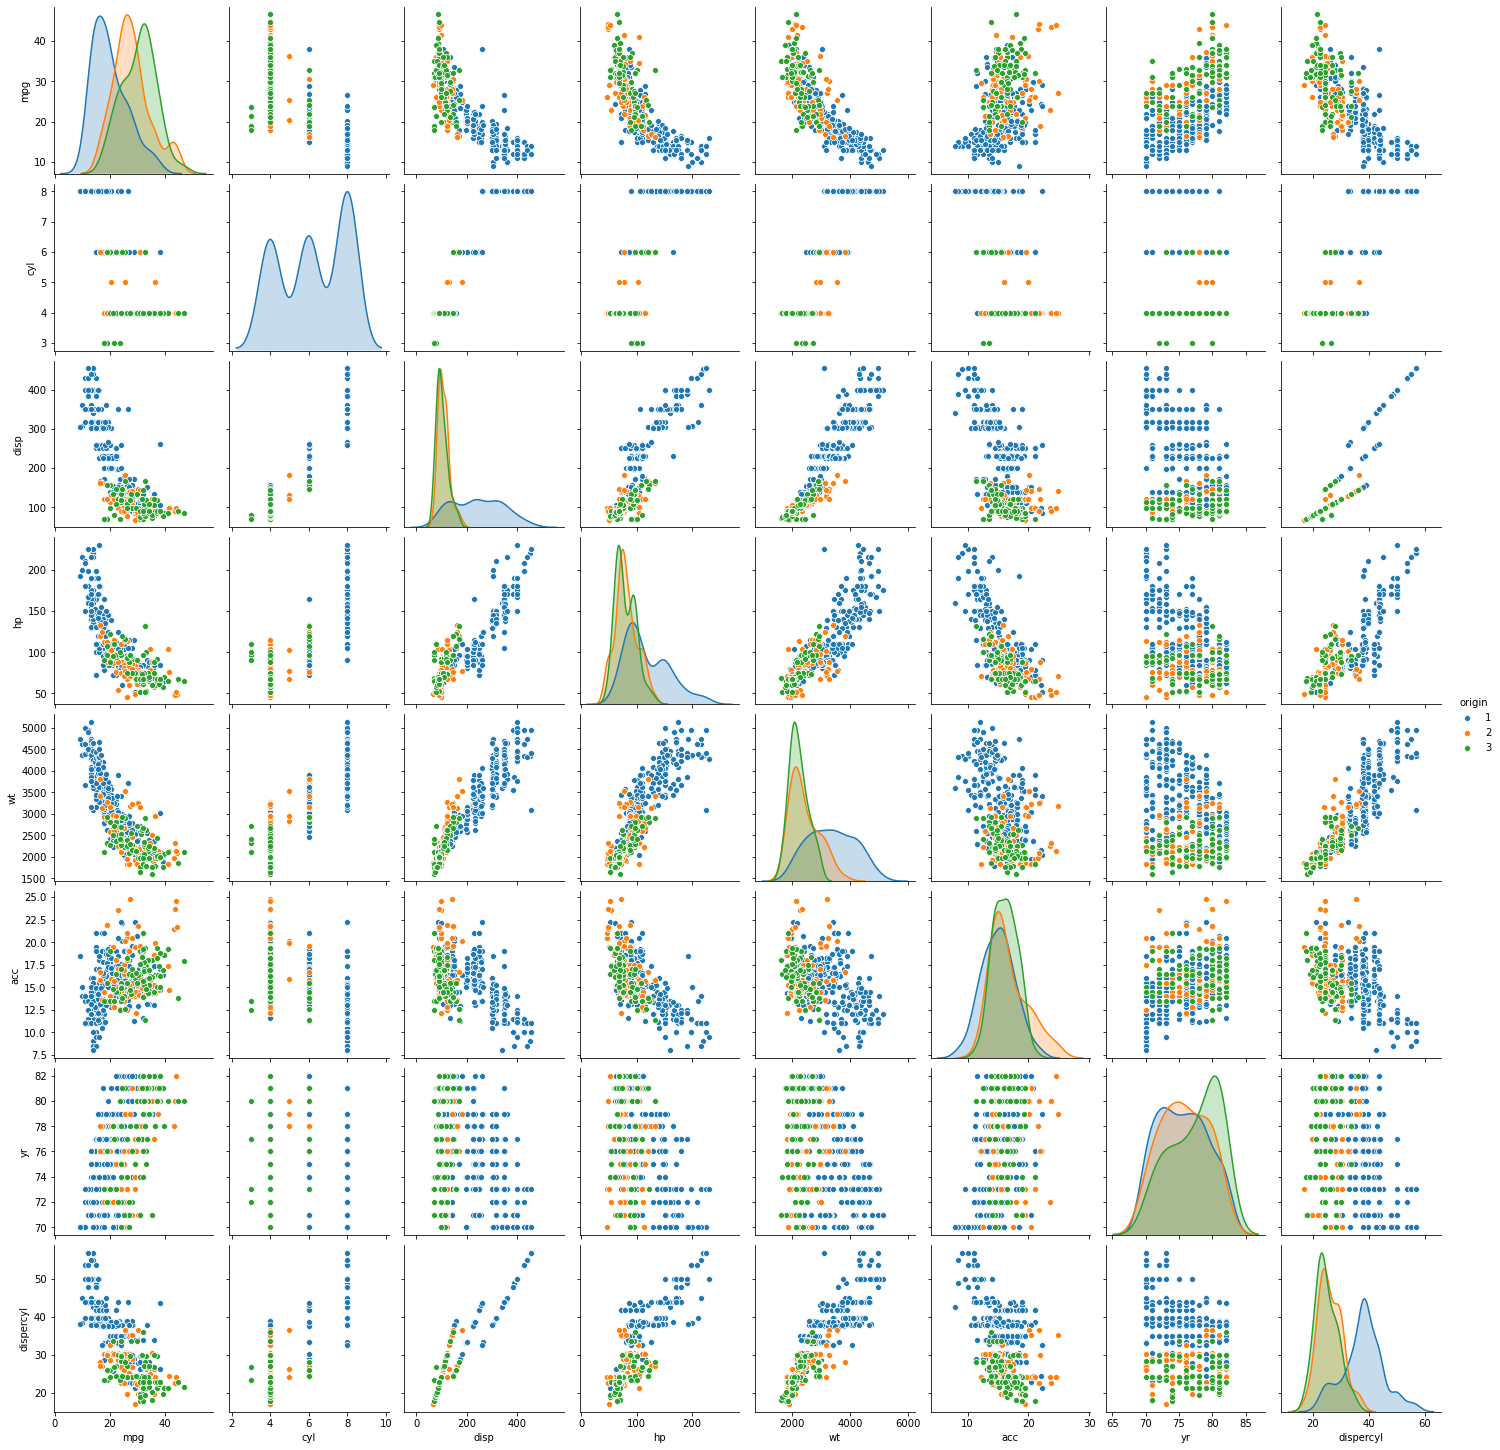

In [2191]:
sns.pairplot(dfauto, hue='origin')

<b>Observation:</b>
- Above graph shows that there can be 3 to 4 natural clusters available in dataset. 
- There is linear relationship betewwn Displacement, HorsePower and weight attributes. 

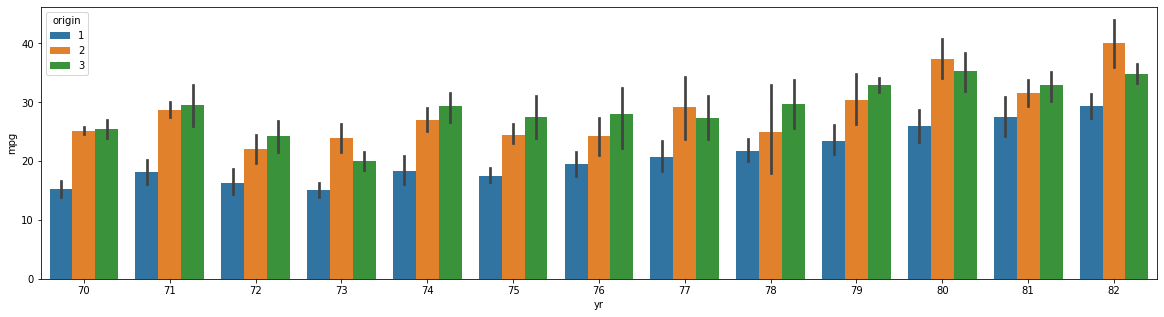

In [2192]:
plt.figure(figsize=(20,5))
sns.barplot(x='yr',y='mpg',hue='origin', data=dfauto)

<b>Observation:</b>
- Average mpg values have been clearly improved as years passed by. 
- Origin2 cars have the most number of highest averages of each year
- Origin1 cars have lower average mpg of each year. 

#### Handling Outlier

In [2193]:
# Handle the outlier using IQR

collst = ['mpg', 'hp', 'acc']

for col in collst:
    q1 = np.percentile(dfauto[col], 25) #Find the Q1
    q3 = np.percentile(dfauto[col], 75) #Find the Q2 
    
    # Find the IQR
    iqr = q3 - q1 
    print("Q1 of", col,":", q1)
    print("Q3 of", col,":", q3)
    print("IQR of", col, ":", iqr)

    lowerlimit = q1 - 1.5 * iqr  #Find the lower boundary
    upperlimit = q3 + 1.5 * iqr  #Find the Upper boundary

    print("Lowerlimit of", col, ":", lowerlimit)
    print("Uppperlimit of", col, ":",  upperlimit)
    
    dfauto[col] = np.where(dfauto[col] > upperlimit, upperlimit, dfauto[col]) #Update the upper boundary value
    dfauto[col] = np.where(dfauto[col] < lowerlimit, lowerlimit, dfauto[col]) #Uppdate the lower boundary value




Q1 of mpg : 17.5
Q3 of mpg : 29.0
IQR of mpg : 11.5
Lowerlimit of mpg : 0.25
Uppperlimit of mpg : 46.25
Q1 of hp : 76.0
Q3 of hp : 125.0
IQR of hp : 49.0
Lowerlimit of hp : 2.5
Uppperlimit of hp : 198.5
Q1 of acc : 13.825000000000001
Q3 of acc : 17.174999999999997
IQR of acc : 3.349999999999996
Lowerlimit of acc : 8.800000000000008
Uppperlimit of acc : 22.199999999999992


#### After outlier removal

Mean of mpg is 23.51369346733669
Mean of disp is 193.42587939698493
Mean of hp is 103.95556865962467
Mean of wt is 2970.424623115578
Mean of acc is 15.55201005025124
Mean of yr is 76.01005025125629


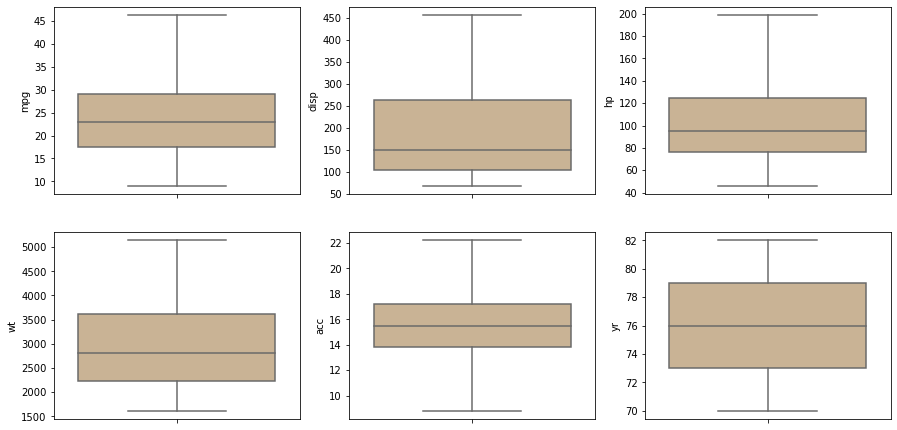

In [2194]:
col = ['mpg', 'disp', 'hp', 'wt', 'acc', 'yr']
plt.figure(figsize=(15,20))
for i,col in enumerate(col):
    plt.subplot(5,3,i+1)
    sns.boxplot(dfauto[col], orient="v" , color="tan")
    print("Mean of",col,"is", dfauto[col].mean())

<b>Observation:</b>
- There is no outlier found. 

### Machine Learning - Clustering

In [2195]:
# Dropping mpg attribute as it is target varilable
dfcluster = dfauto.drop("mpg", axis=1)

In [2196]:
# Apply the scaling using z-score
dfcluster = dfcluster.apply(zscore)

#### Hierarchical Cluster using Average Linkage method

In [2197]:
# Apply average linkage method
Z = linkage(dfcluster, 'average')
# Find the cophenet distance
c, coph_dists = cophenet(Z , pdist(dfcluster))

c


0.7032336791993555

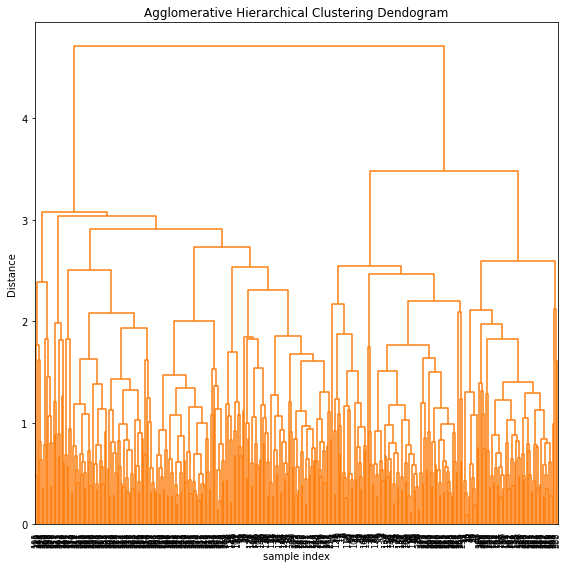

In [2198]:
# Plot the Dendogram
plt.figure(figsize=(8, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 20, leaf_font_size=8. )
plt.tight_layout()

#### Hierarchical Cluster using Single Linkage method

In [2199]:
Z = linkage(dfcluster, 'single')
c, coph_dists = cophenet(Z , pdist(dfcluster))

c

0.5919894840620529

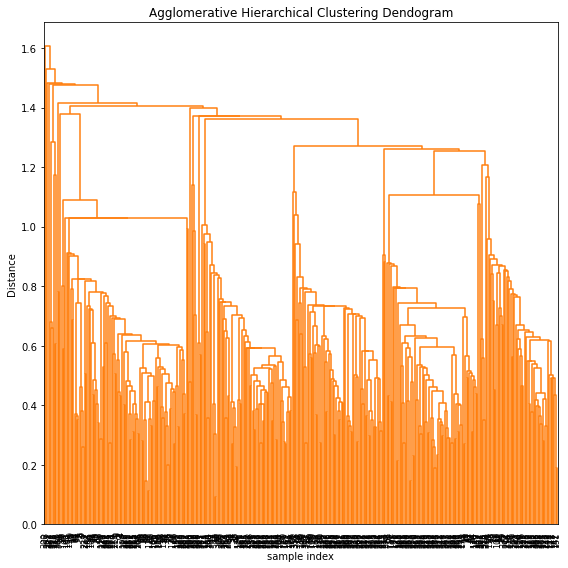

In [2200]:
plt.figure(figsize=(8, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 20, leaf_font_size=8. )
plt.tight_layout()

#### Hierarchical Cluster using Complete Linkage method

In [2201]:
Z = linkage(dfcluster, 'complete')
c, coph_dists = cophenet(Z , pdist(dfcluster))

c

0.6789560939633068

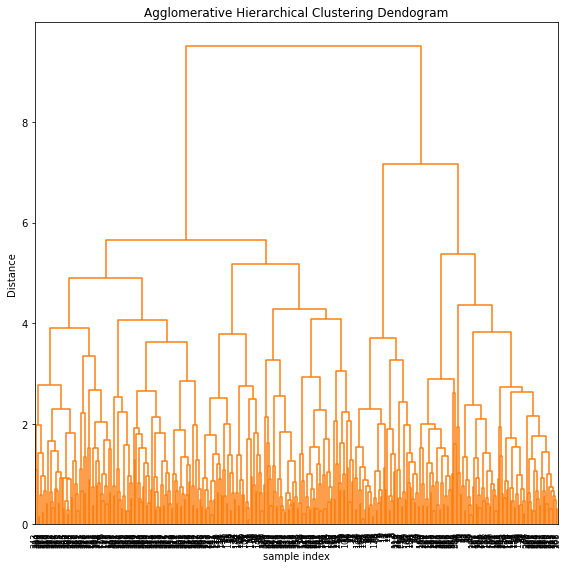

In [2202]:
plt.figure(figsize=(8, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 20, leaf_font_size=8. )
plt.tight_layout()

#### Hierarchical Cluster using Ward Linkage method

In [2203]:
Z = linkage(dfcluster, 'ward')
c, coph_dists = cophenet(Z , pdist(dfcluster))

c

0.6765050626695697

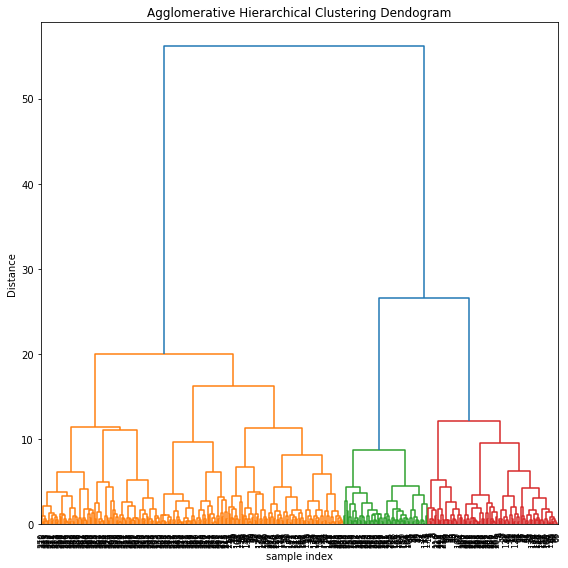

In [2204]:
plt.figure(figsize=(8, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 20, leaf_font_size=8. )
plt.tight_layout()

<b>Observation:</b>
- <b>Average Linkage Method:-</b> The graph shows that maximum dendogram distance is 5. Clusters are formed at very less dendogram distance. Also, there is no natural cluster found. 
- <b>Single Linkage Method:-</b> The maximum dendogram distance between 1.6 and 2. In this method also clursers are not formed properly.
- <b>Complete Linkage Method:-</b> The maximum dendogram distance between 8 and 10. Three clusters are formed at dendogram distance 6. 
- <b>Ward Linkage Method:-</b> The maximum dendogram distance above 50. When compare to other linkage methods, dendogram distance of this method is higher. Also, 3 natural clusters formed above 20 distance. It is higher than distances of other methods. There are sub clusters but distance between clusters is very less. There could be sports car because owners might be customized as per sports requirements.  The principle for clustering is distance between custers should be maximized and distaince between the datapoints within cluster should be minimized. 
- <b>Take away:</b> There are 3 natural clusters found using Ward method. 

In [2205]:
# Find the cluster lables for each data point using AgglomerativeClustering with Ward method. 
agglomodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
agglomodel.fit(dfcluster)
print(agglomodel.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 0 0 0 0 0 0 2 1 1 1 1 0 0 0 0 2 2 2 2
 2 1 1 1 1 1 1 1 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 1 1 1 1 2 0 0 0
 0 0 2 0 1 1 0 0 0 0 1 0 0 1 2 2 2 2 0 0 0 0 2 2 2 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 1 1 1 1 2 2 2 2 2 1 1 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1
 2 1 1 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 0 2 2 0
 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 1 1 1 1 1 1 1 1 0 0 0
 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### K-Means Cluster

In [2206]:
# Find the optimal number of clusters. 
cluster_range = range( 2, 6)   # Expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
    #Initilaize the K-means with number of clusters
    clusters = KMeans(num_clusters, n_init = 10, random_state=42)
    #Find the cluster in dataset
    clusters.fit_predict(dfcluster)
    #Cluster label 
    labels = clusters.labels_ 
    #Cluster centroids
    centroids = clusters.cluster_centers_
    #Cluster errlr
    cluster_errors.append( clusters.inertia_ )  
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,1569.778861
1,3,1138.878816
2,4,974.182473
3,5,848.047291


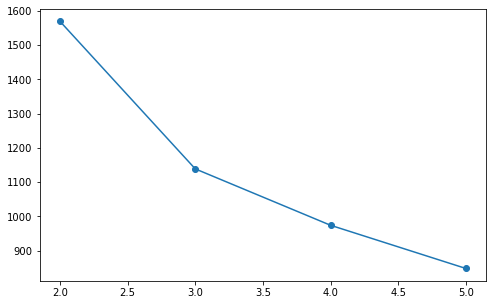

In [2207]:
# Find the best number of cluster using Elbow graph
plt.figure(figsize=(8,5))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

<b>Observation:</b>
- The error is reducing suddenly from cluster 2 to cluster 3. 
- The error reduction rate between cluster 3 and cluster 4 is less than error reduction rate between cluster 2 and cluster 3. 
- The error reduction rate is very less between cluster 4 and cluster 5. 
- Above graph shows that optimal natural cluster is 3. 

For n_clusters = 2 The average silhouette_score is : 0.4206664149166573
For n_clusters = 3 The average silhouette_score is : 0.34257068464337126
For n_clusters = 4 The average silhouette_score is : 0.3055812448750033
For n_clusters = 5 The average silhouette_score is : 0.3089974901877975


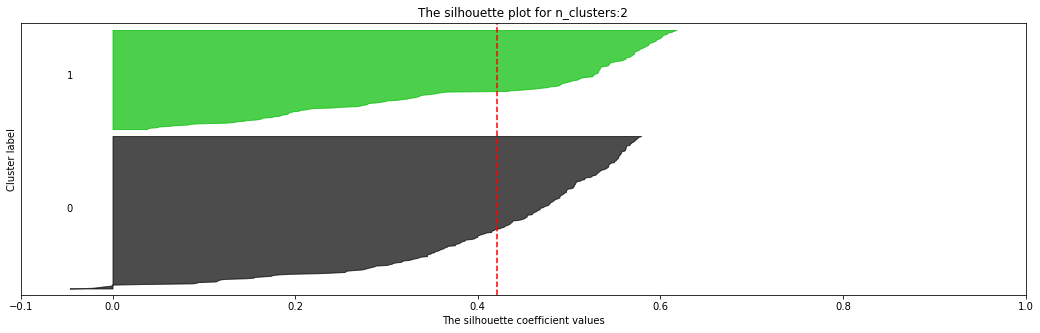

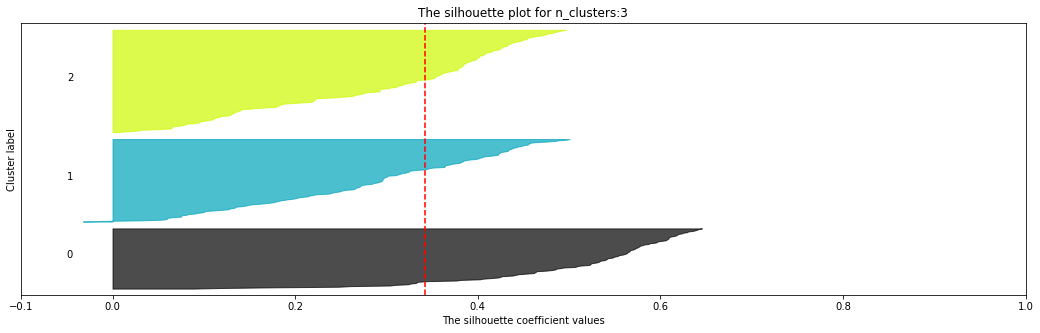

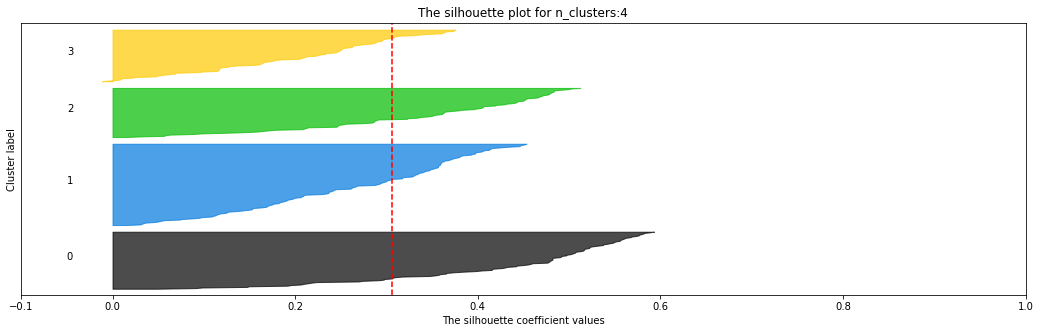

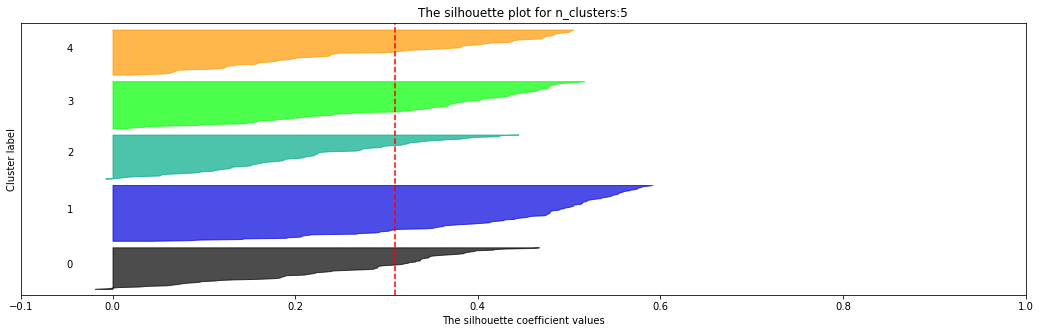

In [2208]:
# Find the optimal number of clusting using Silhouette score

for n_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dfcluster) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(dfcluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfcluster, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfcluster, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for n_clusters:" + str(i+1))
    
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    

<b>Observation:</b>
- Silhouette plot for n_clusters=2 , the cluster 1 is quite larger than cluster 0.So it depicts two clusters merged into one big cluster. So it's not a good approach.  
- For n_clusters=3 there are few negative points and data points are distributed equally. Also, the score is (0.34) higher than n_clusters = 4 and n_clusters = 5 in the plot. 
- Cluster sizes are small for n_clusters = 4 and n_clusters = 5 and score is less when compare to score of n_clusters=3. There are few negative points. 
- <b>Take away</b> - All the n_clusters are having negative points. Here we can choose the number of cluster either 3 or 4. The each cluster size is very small in n_cluster=4 and score is lower than n_cluster=3. Hence we can choose optimal number of cluster as 3. Elbow plot also confirms the same. In Hierarchical clustering, we can see 3 optimal cluster with higher dendogram distance. 

In [2209]:
# Create the K-means model with optimal cluster number 3. 
kmensmodel = KMeans(3, n_init = 10,  random_state=42)
kmensmodel.fit(dfcluster)
kmeanslabels = kmensmodel.labels_
print(kmeanslabels)
dfcluster["Group"] = agglomodel.labels_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 2 2 2 2 2 2 1 0 0 0 0 2 1 2 2 1 1 1 1
 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 2 2 2 2 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 0 0 0 0 1 2 1 2
 2 1 1 2 0 0 2 2 2 2 0 2 2 0 1 1 1 1 2 1 2 1 1 1 1 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 2 1 1 1 2 2 2 1 2 1 2 2 2 2 2 2 2 1
 2 2 0 0 0 0 1 1 1 1 2 2 2 2 1 1 1 1 2 2 2 1 2 0 2 2 1 0 0 0 0 2 2 2 1 2 0
 1 0 0 1 1 1 1 0 0 0 0 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 2 2 2 2 2 1 1 2 2 1 2 1 2 2 1 1 1 1 1 0 0 0 0 0 0 1 0 2 2 2
 1 1 0 1 1 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2
 2 2 2 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 2 1 1 1]


In [2210]:
data = dfcluster.groupby(["Group"]).count()
data[['cyl','disp','hp','wt','yr','origin']]

,cyl,disp,hp,wt,yr,origin
Group,,,,,,
0,233,233,233,233,233,233
1,100,100,100,100,100,100
2,65,65,65,65,65,65


### Apply Linear Regression on each cluster

In [2211]:
# Add label to original dataset
dfauto["lable"] = agglomodel.labels_

Mean of acc is 15.55201005025124
Mean of cyl is 5.454773869346734
Mean of disp is 193.42587939698493
Mean of hp is 103.95556865962467
Mean of mpg is 23.51369346733669
Mean of wt is 2970.424623115578
Mean of dispercyl is 33.36505443886099
Mean of yr is 76.01005025125629


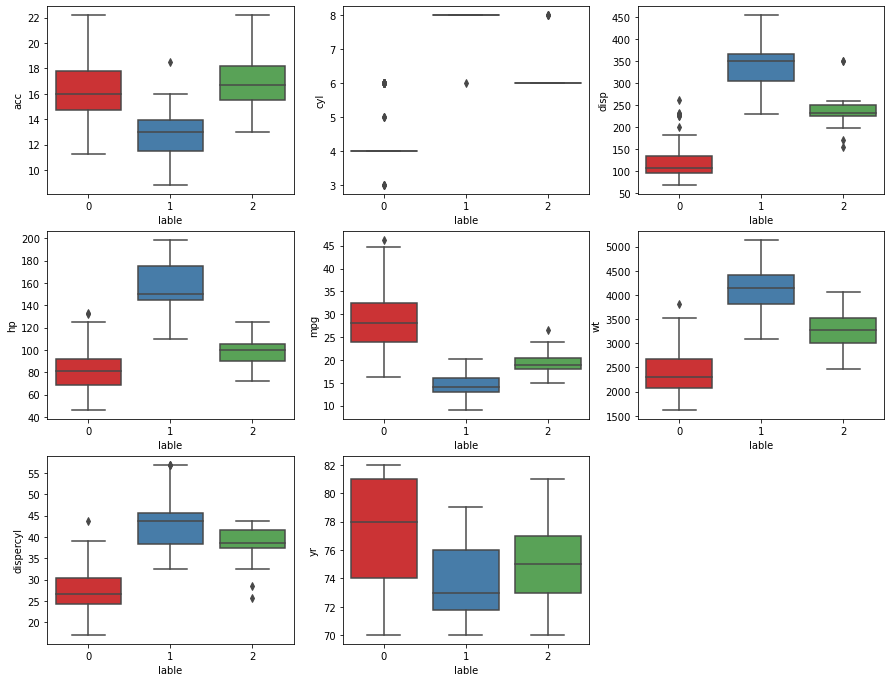

In [2212]:
# Plot the graph for the attributes against the clusters
attr = ['acc', 'cyl', 'disp', 'hp','mpg','wt','dispercyl','yr']

plt.figure(figsize=(15,20))
for i,col in enumerate(attr):
    plt.subplot(5,3,i+1)
    sns.boxplot(x='lable',y=col, data=dfauto,palette="Set1")
    print("Mean of",col,"is", dfauto[col].mean())

<b>Observation:</b>
- <b>Cluster 1(lable 0)</b> cars are having average Horsepower value between 80 and 100, average mpg values between 20 and 25, average weight between 2500 and 3000, high acceleration value and average cylinders between 4 and 5, average displacement value is 5. It shows that this could be medium size of cars. 
- <b>Cluster 2(lable 1)</b> cars are having low acceleration and mpg values while weight,displacement,cylinders and horsepower values are high. It shows that this could be large size of cars. 
- <b>Cluster 3(lable 2)</b> cars are having medium acceleration, low cylinders, horsepower, weight and displacment values. The value of mpg is high. It shows that this could be small size of cars. 
- There are few outliers in mpg, cylinders, horsepower, displacement, acceleration. This should be handled before applying linear regression for each cluster.

In [2213]:
# Seperate the data points of each cluster and store into 3 data frames. 
dfcluster0 = dfauto[dfauto['lable'] == 0]
dfcluster1 = dfauto[dfauto['lable'] == 1]
dfcluster2 = dfauto[dfauto['lable'] == 2]

In [2214]:
# Verify the row and attributes count in each group.
print(dfcluster0.shape)
print(dfcluster1.shape)
print(dfcluster2.shape)

(233, 10)
(100, 10)
(65, 10)


#### Linear Regression for Group 1

In [2215]:
# Handling the outlier using IQR

collst = ['mpg', 'hp','dispercyl']

for col in collst:
    q1 = np.percentile(dfcluster0[col], 25)   
    q3 = np.percentile(dfcluster0[col], 75)
    
    #Find the IQR value
    iqr = q3 - q1
    print("Q1 of", col,":", q1)
    print("Q3 of", col,":", q3)
    print("IQR of", col, ":", iqr)

    #Find the Upper and Lower boundaries
    lowerlimit = q1 - 1.5 * iqr
    upperlimit = q3 + 1.5 * iqr

    print("Lowerlimit of", col, ":", lowerlimit)
    print("Uppperlimit of", col, ":",  upperlimit)
    
    dfcluster0[col] = np.where(dfcluster0[col] > upperlimit, upperlimit, dfcluster0[col]) #Update the upper boundary value
    dfcluster0[col] = np.where(dfcluster0[col] < lowerlimit, lowerlimit, dfcluster0[col]) #Update the lower boudary value


Q1 of mpg : 24.0
Q3 of mpg : 32.4
IQR of mpg : 8.399999999999999
Lowerlimit of mpg : 11.400000000000002
Uppperlimit of mpg : 45.0
Q1 of hp : 69.0
Q3 of hp : 92.0
IQR of hp : 23.0
Lowerlimit of hp : 34.5
Uppperlimit of hp : 126.5
Q1 of dispercyl : 24.25
Q3 of dispercyl : 30.5
IQR of dispercyl : 6.25
Lowerlimit of dispercyl : 14.875
Uppperlimit of dispercyl : 39.875


In [2216]:
dfcluster0.drop("lable", axis=1, inplace=True)


#Split the independed and depended variables
X0 =dfcluster0.drop(['mpg'],axis=1)
y0 =dfcluster0['mpg']


#Split the train and test set
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.30, random_state=34)

#Apply the sclaing using Powertransformer
sc0 = PowerTransformer()
scaledX0train = sc0.fit_transform(X0_train)
scaledX0test = sc0.transform(X0_test)

#Initiating Linear Regression and train the model 
lr0 = LinearRegression()
lr0.fit(scaledX0train, y0_train)
    
print("Training R2")
print(lr0.score(scaledX0train,y0_train))

print("Testing R2")
print(lr0.score(scaledX0test,y0_test))

predicted0 = lr0.predict(scaledX0test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted0, y0_test)))

print("Coefficient")
print(lr0.coef_)

Training R2
0.6961430180404616
Testing R2
0.694334652217877
RMSE
3.097292906721354
Coefficient
[ 2.59726746 -4.58043401 -1.69397593 -2.47365988 -0.28939813  3.31334373
  0.56143256  2.98269377]


#### Linear Regression for Group 2

In [2217]:
# Handling the outlier using IQR
collst = ['acc', 'cyl','dispercyl']

for col in collst:
    q1 = np.percentile(dfcluster1[col], 25)
    q3 = np.percentile(dfcluster1[col], 75)
    #Find the IQR
    iqr = q3 - q1
    print("Q1 of", col,":", q1)
    print("Q3 of", col,":", q3)
    print("IQR of", col, ":", iqr)

    #Find the upper and lower boundaries
    lowerlimit = q1 - 1.5 * iqr
    upperlimit = q3 + 1.5 * iqr

    print("Lowerlimit of", col, ":", lowerlimit)
    print("Uppperlimit of", col, ":",  upperlimit)
    
    dfcluster1[col] = np.where(dfcluster1[col] > upperlimit, upperlimit, dfcluster1[col]) #Update the upper boundary value
    dfcluster1[col] = np.where(dfcluster1[col] < lowerlimit, lowerlimit, dfcluster1[col]) #Update the lower boundary value

Q1 of acc : 11.5
Q3 of acc : 13.925
IQR of acc : 2.4250000000000007
Lowerlimit of acc : 7.862499999999999
Uppperlimit of acc : 17.5625
Q1 of cyl : 8.0
Q3 of cyl : 8.0
IQR of cyl : 0.0
Lowerlimit of cyl : 8.0
Uppperlimit of cyl : 8.0
Q1 of dispercyl : 38.3125
Q3 of dispercyl : 45.71875
IQR of dispercyl : 7.40625
Lowerlimit of dispercyl : 27.203125
Uppperlimit of dispercyl : 56.828125


In [2218]:
dfcluster1.drop("lable", axis=1, inplace=True)


#Split the independent and dependent variables
X1 =dfcluster1.drop(['mpg'],axis=1)
y1 =dfcluster1['mpg']


#Split the train and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=32)

#Apply the scaling using PowerTransformer
sc1 = PowerTransformer()
scaledX1train = sc1.fit_transform(X1_train)
scaledX1test = sc1.transform(X1_test)

#Initializing the Linear Regression and train the model
lr1 = LinearRegression()
lr1.fit(scaledX1train, y1_train)


print("Training R2")
print(lr1.score(scaledX1train,y1_train))

print("Testing R2")
print(lr1.score(scaledX1test,y1_test))

predicted1 = lr1.predict(scaledX1test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted1, y1_test)))
print("Coefficient")
print(lr1.coef_)

Training R2
0.6119113707410639
Testing R2
0.6117427717504822
RMSE
1.256494725484122
Coefficient
[ 0.         -0.12832627 -0.61475977 -0.21542511 -1.06399094  1.15724921
  0.         -0.60025118]


#### Linear Regression for Group 3

In [2219]:
#Handling outlier using IQR
collst = ['mpg', 'disp','acc','cyl','wt','dispercyl']

for col in collst:
    q1 = np.percentile(dfcluster2[col], 25)
    q3 = np.percentile(dfcluster2[col], 75)
    #Find the IQR
    iqr = q3 - q1
    print("Q1 of", col,":", q1)
    print("Q3 of", col,":", q3)
    print("IQR of", col, ":", iqr)

    #Find the lower and upper boundaries
    lowerlimit = q1 - 1.5 * iqr
    upperlimit = q3 + 1.5 * iqr

    print("Lowerlimit of", col, ":", lowerlimit)
    print("Uppperlimit of", col, ":",  upperlimit)
    
    dfcluster2[col] = np.where(dfcluster2[col] > upperlimit, upperlimit, dfcluster2[col]) #Update the upper boundary value
    dfcluster2[col] = np.where(dfcluster2[col] < lowerlimit, lowerlimit, dfcluster2[col]) #Update the lower boundary value


Q1 of mpg : 18.0
Q3 of mpg : 20.5
IQR of mpg : 2.5
Lowerlimit of mpg : 14.25
Uppperlimit of mpg : 24.25
Q1 of disp : 225.0
Q3 of disp : 250.0
IQR of disp : 25.0
Lowerlimit of disp : 187.5
Uppperlimit of disp : 287.5
Q1 of acc : 15.5
Q3 of acc : 18.2
IQR of acc : 2.6999999999999993
Lowerlimit of acc : 11.450000000000001
Uppperlimit of acc : 22.25
Q1 of cyl : 6.0
Q3 of cyl : 6.0
IQR of cyl : 0.0
Lowerlimit of cyl : 6.0
Uppperlimit of cyl : 6.0
Q1 of wt : 3012.0
Q3 of wt : 3525.0
IQR of wt : 513.0
Lowerlimit of wt : 2242.5
Uppperlimit of wt : 4294.5
Q1 of dispercyl : 37.5
Q3 of dispercyl : 41.666666666666664
IQR of dispercyl : 4.166666666666664
Lowerlimit of dispercyl : 31.250000000000004
Uppperlimit of dispercyl : 47.91666666666666


In [2220]:
dfcluster2.drop("lable", axis=1, inplace=True)


#Split the independent and dependent variables
X2 =dfcluster2.drop(['mpg'],axis=1)
y2 =dfcluster2['mpg']

#Split the train and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=81)

#Apply the scaling using PowerTransformer
sc2 = PowerTransformer()
scaledX2train = sc2.fit_transform(X2_train)
scaledX2test = sc2.transform(X2_test)

#Initializing the Linear Regression and train the model
lr2 = LinearRegression()
lr2.fit(scaledX2train, y2_train)


print("Training R2")
print(lr2.score(scaledX2train,y2_train))

print("Testing R2")
print(lr2.score(scaledX2test,y2_test))

predicted2 = lr2.predict(scaledX2test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted2, y2_test)))
print("Coefficient")
print(lr2.coef_)

Training R2
0.4192587527114048
Testing R2
0.4228201986126554
RMSE
1.5981800103819286
Coefficient
[ 0.          1.01885786  0.21056876 -1.25339075 -0.37122344  1.53540437
  0.         -1.16342399]


#### Linear Regression for entire dataset (without any group)

In [2221]:

#Already hanlded outlier on entire dataset. 
#Dropping cluster lable attribute
dfauto.drop("lable", axis=1, inplace=True)

#Split the independed and depended variables
X =dfauto.drop(['mpg'],axis=1)
y =dfauto['mpg']

#Split the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=92)

#Apply the scaling using PowerTransformer
sc = PowerTransformer()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)

#Initializing Linear Regression and train the model
lr = LinearRegression()
lr.fit(scaledXtrain, y_train)


print("Training R2")
print(lr.score(scaledXtrain,y_train))

print("Testing R2")
print(lr.score(scaledXtest,y_test))

predicted = lr.predict(scaledXtest)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))
print("Coefficient")
print(lr.coef_)


Training R2
0.8460382344098831
Testing R2
0.8484848478449307
RMSE
2.923294351881456
Coefficient
[  6.08001087 -13.92795535  -3.8328412    0.          -1.80480174
   2.80440211   0.47838234   5.59189096]


<b>Observation:</b>
- Cluster 0: Training and test score of regression model is .69 and RMSE is 3.09. 
- Cluster 1: Training and test score of regression model is .61 and RMSE is 1.25
- Cluster 2: Training score is 0.41, test score is 0.42 and RMSE is 1.59 for this regression model. The count of data points is also very less. Hence, this model can't be performed well in production. 
- There is less error in Cluster 1 while error rate is high in Cluster 0. 
- Without Cluster: Training and test score is 0.84 and RMSE is 2.92. This is a good model since record cound is high when compare to record count of other cluster groups model. 


### Improvisation
- There are 398 data points in this dataset. This is not sufficient to build the optimal model because if we do the further split to build the 3 different models for each group, training data will be reduced more for each group. 
- We would need good amount of data to build the model for each cluster. For an instance, the model accuracy score is very less for Cluster 2 because training data is very less for this model. 
- There are 4 cars with 3 cylinders and 3 cars with 5 cylinders in dataset. If there are more data, we will have a good model. 
- If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.

## Part 2

#### Objective
Goal is to build a synthetic data generation model which can impute values wherever
empty the company has missed recording the data

#### Attribute Information
1. A, B, C, D: specific chemical composition measure of the wine
2. Quality: quality of wine [ Low and High ]

#### Import Libraries

In [2222]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2223]:
#Read the dataset
dfcompany = pd.read_excel("Company.xlsx")
dfcompany.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [2224]:
#Verify the number of rows and attributes
dfcompany.shape

(61, 5)

<b>Observation:</b>
- There are 61 rows and 5 attributes

In [2225]:
#Checking the data type of each attributes
dfcompany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


<b>Observation:</b>
- Data type of Quality attribute is Object and rest ones are int64. 
- There are missing values in Quality attribute.

In [2226]:
#Checking the unique values in Quality attribute
dfcompany['Quality'].unique()

array(['Quality A', 'Quality B', nan], dtype=object)

In [2227]:
#Function for encoding the string value
def quality(x):
    if x=="Quality A":
        return 1
    elif x=="Quality B":
        return 0

In [2228]:
#Apply the encoding
dfcompany['Quality']=dfcompany['Quality'].apply(quality)

In [2229]:
dfcompany['Quality'].value_counts()

1.0    26
0.0    17
Name: Quality, dtype: int64

In [2230]:
#label_encoder = LabelEncoder()
#dfcompany['Quality'] = label_encoder.fit_transform(dfcompany['Quality'].astype(str)) 

In [2231]:
#dfcompany['Quality'] = np.where(dfcompany['Quality'] == 0, np.nan, dfcompany['Quality'])

In [2232]:
#Note: Scaling is not required since all the attributes are in same scale
imputer = KNNImputer(n_neighbors=3, weights="uniform")
correcteddata = imputer.fit_transform(dfcompany)

In [2233]:
dfcompany["ImputedValue"] = correcteddata[:,-1]

In [2234]:
#Compare original value and imputed value 
dfcompany[dfcompany["Quality"].isnull()]

,A,B,C,D,Quality,ImputedValue
2,159,163,135,131,NaN,0.0
5,153,140,154,199,NaN,0.0
7,191,144,143,154,NaN,0.0
9,145,178,158,141,NaN,0.0
14,186,142,146,174,NaN,0.0
18,167,171,163,191,NaN,0.0
23,171,185,181,183,NaN,0.0
27,193,169,199,155,NaN,0.0
29,29,49,6,35,NaN,1.0
32,161,138,143,139,NaN,0.0


In [2235]:
#update imputed value to original attribute
dfcompany["Quality"] = dfcompany["ImputedValue"]
dfcompany["Quality"].astype("int")

0     1
1     0
2     0
3     1
4     1
     ..
56    0
57    0
58    1
59    0
60    0
Name: Quality, Length: 61, dtype: int32

In [2236]:
dfcompany.drop('ImputedValue',axis=1, inplace=True)

In [2237]:
# Build the model and check the accuracy

#Split the independent and depended variables
X = dfcompany.drop("Quality", axis=1)
y = dfcompany["Quality"]

#Split the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [2238]:
#Intializing the RandomForest classifier and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=5)
rf.fit(X_train, y_train)

#Predict the values for test set
predict = rf.predict(X_test)

In [2239]:
trainacc = rf.score(X_train, y_train)
print("Training accuracy:", trainacc)
testacc = rf.score(X_test, y_test)
print("Test accuracy:", testacc)

modelscore = accuracy_score(y_test, predict)

Training accuracy: 1.0
Test accuracy: 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



Text(0.5, 1.0, 'Random Forest')

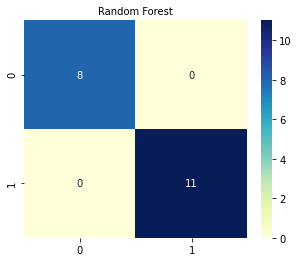

In [2240]:
# Print the classification report
print(classification_report(y_test, predict))

# Plot the confusion matrix for Decision Tree
confusion = confusion_matrix(y_test,predict)
plt.figure(figsize=(5,4))
sns.heatmap(confusion,annot=True,fmt='',cmap='YlGnBu')
plt.title("Random Forest", fontsize =10)


<b>Observation:</b>
- Imputed the missing values using KNNImputer. Random Forest classification algorithm predicted 100% accuratly. 

## End Project